<a href="https://colab.research.google.com/github/Pantercode/Analise_preco_casas/blob/main/discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importa√ß√µes de libs necess√°rias pra analise e desenvolvimento de dataviz e analise mais profundas de machine leraning
import pandas as pd
import importlib
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Leitura do dataset
df = pd.read_parquet(r'C:\Users\marcell.oliveira\Desktop\Global_Housing_Market_Analysis _2015_2024\arquivos\global_housing_market_extended.parquet')

In [ ]:
# Contar o n√∫mero de valores nulos por coluna
nulos_por_coluna = df.isnull().sum()

# Exibir o n√∫mero de colunas e linhas
linhas = df.shape[0]
colunas = df.shape[1]
print(f'O n√∫mero de colunas √© {colunas} e n√∫mero de linhas √© {linhas}')

# Exibir a contagem de valores nulos por coluna
print("N√∫mero de valores nulos por coluna:")
print(nulos_por_coluna)
df.dtypes


O n√∫mero de colunas √© 11 e n√∫mero de linhas √© 200
N√∫mero de valores nulos por coluna:
Country                  0
Year                     0
House Price Index        0
Rent Index               0
Affordability Ratio      0
Mortgage Rate (%)        0
Inflation Rate (%)       0
GDP Growth (%)           0
Population Growth (%)    0
Urbanization Rate (%)    0
Construction Index       0
dtype: int64


Country                   object
Year                       int64
House Price Index        float64
Rent Index               float64
Affordability Ratio      float64
Mortgage Rate (%)        float64
Inflation Rate (%)       float64
GDP Growth (%)           float64
Population Growth (%)    float64
Urbanization Rate (%)    float64
Construction Index       float64
dtype: object

Um mapa de correla√ß√£o √© uma visualiza√ß√£o gr√°fica que exibe a rela√ß√£o entre diferentes vari√°veis de um conjunto de dados. Ele √© geralmente utilizado para mostrar como as vari√°veis est√£o correlacionadas entre si, usando uma matriz onde cada c√©lula representa o valor da correla√ß√£o entre duas vari√°veis. A correla√ß√£o pode variar entre -1 e +1:

+1: Correla√ß√£o positiva perfeita (quando uma vari√°vel aumenta, a outra tamb√©m aumenta).

0: Nenhuma correla√ß√£o (as vari√°veis n√£o t√™m rela√ß√£o entre si).

-1: Correla√ß√£o negativa perfeita (quando uma vari√°vel aumenta, a outra diminui).

Esses mapas podem ser gerados com diferentes escalas de cores, sendo comuns as representa√ß√µes em tons de azul (para correla√ß√µes negativas) e vermelho (para correla√ß√µes positivas).

In [ ]:
colunas_numericas = [
    'House Price Index', 'Rent Index', 'Affordability Ratio',
    'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
    'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'
]

# Remove valores ausentes
df_corr = df.dropna(subset=colunas_numericas)

# Calcula a matriz de correla√ß√£o
corr = df_corr[colunas_numericas].corr()

# Gera o gr√°fico interativo
fig = px.imshow(
    corr,
    text_auto=".2f",
    color_continuous_scale="RdBu",
    aspect="auto",
    title="Mapa de Correla√ß√£o entre Indicadores"
)

fig.update_layout(
    xaxis_title="Vari√°vel",
    yaxis_title="Vari√°vel",
    width=800,
    height=700
)

fig.show()

In [ ]:
#Gr√°fico  que faz a Analise do pre√ßo das casas por Pais ao Longo do Anos
fig = px.line(
    df,
    x="Year",
    y="House Price Index",
    color="Country",
    title="Pre√ßo de Casas ao longo do tempo por Pa√≠s",
)

# Adiciona filtro dropdown interativo
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {"label": pais, "method": "update",
                 "args": [
                     {"visible": [c == pais for c in df["Country"].unique()]},
                     {"title": f"House Price Index - {pais}"}
                 ]}
                for pais in df["Country"].unique()
            ],
            "direction": "down",
            "showactive": True,
            "x": 0.05,
            "xanchor": "left",
            "y": 1.1,
            "yanchor": "top"
        }
    ]
)

fig.show()


In [ ]:
# Grafico que refer√™ncia os 7 maiores PIBs dos paises independente do ano
top_7 = df.sort_values(by="GDP Growth (%)", ascending=False).head(7)

# Ordena 7 em ordem crescente de PIB
top_7 = top_7.sort_values(by="GDP Growth (%)")

# Gr√°fico
fig_top = px.bar(
    top_7,
    x="GDP Growth (%)",
    y=top_7["Country"] + " - " + top_7["Year"].astype(str),
    color="Country",
    orientation="h",
    text="GDP Growth (%)",
    title="üîù Top 7 - Maiores Crescimentos do PIB "
)
fig_top.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig_top.update_layout(yaxis_title="Pa√≠s - Ano", xaxis_title="Crescimento do PIB (%)")
fig_top.show()



In [ ]:
# Grafico que refer√™ncia os 7 piores PIBs dos paises independente do ano
bottom_7 = df.sort_values(by="GDP Growth (%)", ascending=True).head(7)

# Ordenar em ordem crescente de PIB (
bottom_7 = bottom_7.sort_values(by="GDP Growth (%)")

# Gr√°fico
fig_bottom = px.bar(
    bottom_7,
    x="GDP Growth (%)",
    y=bottom_7["Country"] + " - " + bottom_7["Year"].astype(str),  # Pa√≠s + Ano no eixo Y
    color="Country",
    orientation="h",
    text="GDP Growth (%)",
    hover_data=["Year"],
    title="üîª Top 7 - Piores Crescimentos do PIB "
)
fig_bottom.update_traces(texttemplate="%{text:.2f}", textposition="outside")
fig_bottom.update_layout(yaxis_title="Pa√≠s - Ano", xaxis_title="Crescimento do PIB (%)")
fig_bottom.show()


In [ ]:
#Distribui√ß√£o do crescimento Versus a contru√ß√£o
fig = px.scatter(
    df,
    x="Urbanization Rate (%)",
    y="Construction Index",
    color="Country",
    size=np.abs(df["Population Growth (%)"]),  # üëà valor absoluto
    title="Urbaniza√ß√£o VS Constru√ß√£o "
)
fig.show()


In [ ]:
#Gr√°fico Agrupado da infla√ß√£o ao longo do Tempo
# Agrupar por pa√≠s e ano, somando infla√ß√£o
df_total = df.groupby(["Country", "Year"], as_index=False)["Inflation Rate (%)"].sum()

# Ordenar os anos (caso o tipo da coluna seja string)
df_total["Year"] = df_total["Year"].astype(int)
df_total = df_total.sort_values(by="Year")


fig = px.bar(
    df_total[df_total["Country"] == df_total["Country"].iloc[0]],  # Mostra o 1¬∫ pa√≠s por padr√£o
    x="Year",
    y="Inflation Rate (%)",
    text="Inflation Rate (%)",
    color="Country",
    title=f"Soma da Infla√ß√£o por Ano - {df_total['Country'].iloc[0]}"
)

botoes = []
for pais in df_total["Country"].unique():
    df_pais = df_total[df_total["Country"] == pais]
    botoes.append(
        {
            "label": pais,
            "method": "update",
            "args": [
                {
                    "x": [df_pais["Year"]],
                    "y": [df_pais["Inflation Rate (%)"]],
                    "type": "bar"
                },
                {
                    "title": f"Soma da Infla√ß√£o por Ano - {pais}"
                }
            ]
        }
    )

# Aplicar dropdown
fig.update_layout(
    updatemenus=[
        {
            "buttons": botoes,
            "direction": "down",
            "x": 0.05,
            "xanchor": "left",
            "y": 1.15,
            "yanchor": "top"
        }
    ],
    showlegend=False
)

# Ajustes visuais
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Total de Infla√ß√£o (%)"
)

fig.show()


In [ ]:
# Grafico que faz a analise todo os indicadores ao somando e agrupando ao longo dos anos
metricas = [col for col in df.select_dtypes(include="number").columns if col not in ["House Price Index", "Year"]]
anos = sorted(df["Year"].dropna().unique())
paises = sorted(df["Country"].dropna().unique())

# Listas para armazenar os tra√ßos e as combina√ß√µes
traces = []
comb_keys = []

# Monta todos os tra√ßos de mapa + barra por (pa√≠s, ano)
for ano in anos:
    df_ano = df[df["Year"] == ano]
    for pais in paises:
        df_sel = df_ano[df_ano["Country"] == pais]

        if not df_sel.empty:
            y_vals = [df_sel.iloc[0][m] for m in metricas]
        else:
            y_vals = [0]*len(metricas)

        # Mapa (fixo por ano, aparece junto com a barra)
        trace_map = go.Choropleth(
            locations=df_ano["Country"],
            locationmode="country names",
            z=df_ano["House Price Index"],
            colorscale="Viridis",
            colorbar_title="House Price Index",
            text=df_ano["Country"],
            visible=False,
            showscale=True
        )

        # Barras
        trace_bar = go.Bar(
            x=metricas,
            y=y_vals,
            text=[f"{v:.2f}" for v in y_vals],
            textposition="outside",
            marker_color="indianred",
            visible=False
        )

        traces.append((trace_map, trace_bar))
        comb_keys.append((pais, ano))

# Cria o gr√°fico
fig = make_subplots(
    rows=2, cols=1,
    specs=[[{"type": "choropleth"}], [{"type": "xy"}]],
    row_heights=[0.55, 0.45],
    vertical_spacing=0.12
)

# Adiciona todos os tra√ßos
for tmap, tbar in traces:
    fig.add_trace(tmap, row=1, col=1)
    fig.add_trace(tbar, row=2, col=1)

# Inicialmente, ativa o primeiro par
fig.data[0].visible = True
fig.data[1].visible = True

# Bot√µes dropdown
botoes_pais = []
for pais in paises:
    visible = []
    for (p, a) in comb_keys:
        show = (p == pais and a == anos[0])
        visible.extend([show, show])
    botoes_pais.append(
        dict(
            label=pais,
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"üåç Mapa + Indicadores Econ√¥micos - {pais} ({anos[0]})"}
            ]
        )
    )

botoes_ano = []
for ano in anos:
    visible = []
    for (p, a) in comb_keys:
        show = (a == ano and p == paises[0])
        visible.extend([show, show])
    botoes_ano.append(
        dict(
            label=str(ano),
            method="update",
            args=[
                {"visible": visible},
                {"title.text": f"üåç Mapa + Indicadores Econ√¥micos - {paises[0]} ({ano})"}
            ]
        )
    )

# Layout final
fig.update_layout(
    height=900,
    margin=dict(t=80, b=100),
    title_text=f"üåç Mapa + Indicadores Econ√¥micos - {paises[0]} ({anos[0]})",
    title_x=0.5,
    updatemenus=[
        dict(
            buttons=botoes_pais,
            direction="down",
            showactive=True,
            x=0.01, y=1.2,
            xanchor="left", yanchor="top"
        ),
        dict(
            buttons=botoes_ano,
            direction="down",
            showactive=True,
            x=0.25, y=1.2,
            xanchor="left", yanchor="top"
        )
    ]
)

fig.update_xaxes(tickangle=-45, row=2, col=1)
fig.update_yaxes(title="Valor das M√©tricas", row=2, col=1)

fig.show()


A detec√ß√£o de outliers √© uma t√©cnica usada para identificar pontos de dados que se desviam significativamente do comportamento esperado ou padr√£o em um conjunto de dados. Em um contexto de an√°lise de s√©ries temporais, como anos ou datas espec√≠ficas, detectar anos fora do padr√£o pode ser √∫til para identificar erros, dados inconsistentes ou eventos at√≠picos que podem impactar as conclus√µes da an√°lise.

Analise Avan√ßadas de Machine Learning

In [ ]:
# Detec√ß√£o de Outliers detectar anos fora do padr√£o (outliers)

# Seleciona apenas as colunas num√©ricas que ser√£o usadas na an√°lise
colunas_numericas = [
    'House Price Index', 'Rent Index', 'Affordability Ratio',
    'Mortgage Rate (%)', 'Inflation Rate (%)', 'GDP Growth (%)',
    'Population Growth (%)', 'Urbanization Rate (%)', 'Construction Index'
]

# Remove linhas com dados ausentes
df_limpo = df.dropna(subset=colunas_numericas)

# Normaliza os dados para que fiquem na mesma escala
normalizador = StandardScaler()
dados_normalizados = normalizador.fit_transform(df_limpo[colunas_numericas])

# Aplica o modelo de detec√ß√£o de valores fora do padr√£o
modelo = IsolationForest(contamination=0.05, random_state=42)
df_limpo['Valor_Atypico'] = modelo.fit_predict(dados_normalizados)  # -1 = fora do padr√£o

# Cria uma nova coluna com o r√≥tulo mais f√°cil de entender
df_limpo['Situacao'] = df_limpo['Valor_Atypico'].map({1: 'Normal', -1: 'Fora do Padr√£o'})

# Mostra apenas os casos que foram considerados fora do padr√£o
fora_do_padrao = df_limpo[df_limpo['Situacao'] == 'Fora do Padr√£o']
print(fora_do_padrao[['Country', 'Year'] + colunas_numericas].head())

    Country  Year  House Price Index  Rent Index  Affordability Ratio  \
26       UK  2021          99.524299  100.571648             5.526951   
41   France  2016          86.936130   57.054460             3.163996   
45   France  2020         169.552323   77.244118             3.097539   
52    Italy  2017         102.359584  117.425578             3.109390   
131  Mexico  2016         134.126658  117.409440             6.076849   

     Mortgage Rate (%)  Inflation Rate (%)  GDP Growth (%)  \
26            1.621580            4.695570       -0.583115   
41            1.972215            4.939544       -1.430491   
45            6.026910            1.093363        0.554509   
52            6.349394            0.780539        5.129145   
131           4.663109            6.558183       -1.179922   

     Population Growth (%)  Urbanization Rate (%)  Construction Index  
26                2.291605              88.617857          143.189151  
41                0.116415              85.3

Feature Importance (Import√¢ncia das Vari√°veis ou Atributos) √© uma t√©cnica usada para identificar quais caracter√≠sticas (ou vari√°veis) de um conjunto de dados t√™m maior impacto na previs√£o ou no modelo de aprendizado de m√°quina. No caso de previs√£o de pre√ßos de im√≥veis, as vari√°veis podem incluir atributos como taxa de juros, √≠ndice de urbaniza√ß√£o, tamanho do im√≥vel, localiza√ß√£o, entre outros.

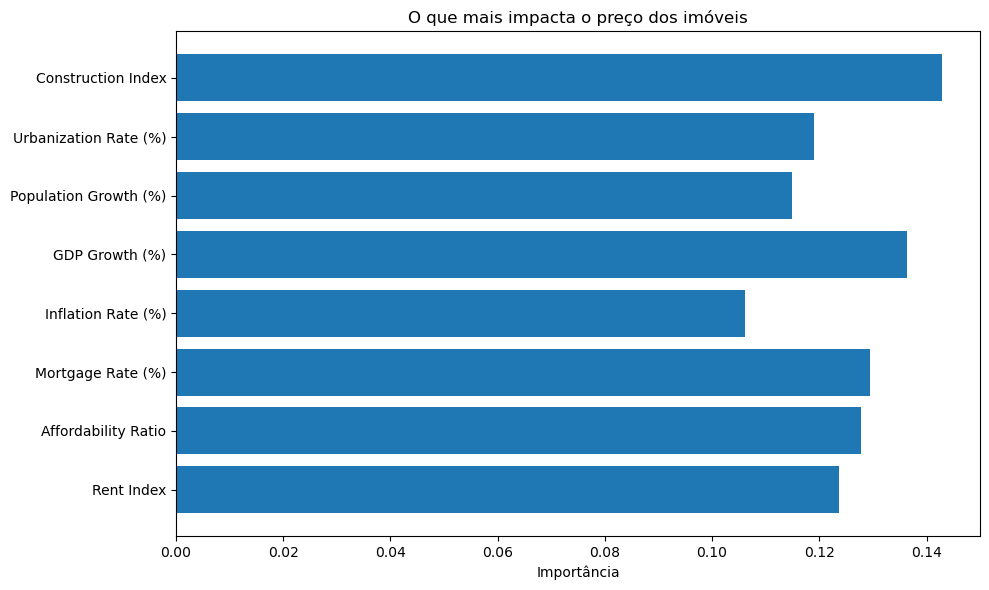

In [ ]:
#Feature Importance para Pre√ßo de Im√≥veis
# Define a vari√°vel alvo (pre√ßo dos im√≥veis) e os indicadores que ser√£o usados como entrada
colunas_explicativas = [
    'Rent Index', 'Affordability Ratio', 'Mortgage Rate (%)',
    'Inflation Rate (%)', 'GDP Growth (%)', 'Population Growth (%)',
    'Urbanization Rate (%)', 'Construction Index'
]

alvo = 'House Price Index'

# Remove linhas com valores ausentes
df_limpo = df.dropna(subset=colunas_explicativas + [alvo])

# Normaliza os dados
normalizador = StandardScaler()
X = normalizador.fit_transform(df_limpo[colunas_explicativas])
y = df_limpo[alvo]

# Cria o modelo de regress√£o de floresta aleat√≥ria
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X, y)

# Import√¢ncia de cada vari√°vel
importancias = modelo.feature_importances_

# Exibe em gr√°fico
plt.figure(figsize=(10, 6))
plt.barh(colunas_explicativas, importancias)
plt.xlabel('Import√¢ncia')
plt.title('O que mais impacta o pre√ßo dos im√≥veis')
plt.tight_layout()
plt.show()


A An√°lise de Correla√ß√£o Cruzada entre Indicadores √© uma t√©cnica usada para entender a rela√ß√£o entre diferentes vari√°veis ao longo do tempo ou em diferentes conjuntos de dados. Essa an√°lise verifica como duas vari√°veis se comportam em rela√ß√£o uma √† outra em diferentes per√≠odos ou sob diferentes condi√ß√µes.

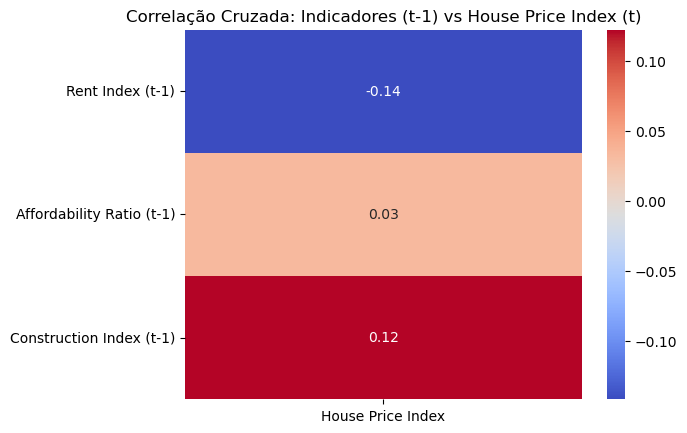

In [ ]:
# An√°lise de Correla√ß√£o Cruzada entre Indicadores


# Organiza os dados por pa√≠s e ano
df_ordenado = df.sort_values(by=["Country", "Year"])

# Cria c√≥pias defasadas (lag) para comparar influ√™ncia temporal
df_ordenado["Rent Index (t-1)"] = df_ordenado.groupby("Country")["Rent Index"].shift(1)
df_ordenado["Affordability Ratio (t-1)"] = df_ordenado.groupby("Country")["Affordability Ratio"].shift(1)
df_ordenado["Construction Index (t-1)"] = df_ordenado.groupby("Country")["Construction Index"].shift(1)




colunas_lag = [
    "Rent Index (t-1)",
    "Affordability Ratio (t-1)",
    "Construction Index (t-1)"
]

df_corr = df_ordenado.dropna(subset=colunas_lag + ["House Price Index"])

# Calcula correla√ß√£o cruzada entre indicadores defasados e o pre√ßo do im√≥vel atual
corr_cruzada = df_corr[colunas_lag + ["House Price Index"]].corr()

# Mostra a correla√ß√£o cruzada como heatmap
sns.heatmap(
    corr_cruzada[["House Price Index"]].drop(index="House Price Index"),
    annot=True, cmap="coolwarm", fmt=".2f", cbar=True
)
plt.title("Correla√ß√£o Cruzada: Indicadores (t-1) vs House Price Index (t)")
plt.show()
